# Determing CpG ratio per Gene Function

# Step 1: Obtain GO slim information (gene function)

In [6]:
!head -2 ../data-results/Geoduck-transcriptome-v2-GO-SlimUnique.csv

Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,SPID,GOID,GO_id,term,GOSlim_bin,aspect,contig
comp95_c0_seq1,sp,Q8K358,PIGU_MOUSE,67.53,77,25,0,231,1,258,334,7.00E-32,119,Q8K358,GO:0006506,GO:0006506,GPI anchor biosynthetic process,protein metabolism,P,95


In [3]:
!date

Fri Nov 13 07:18:28 PST 2015


In [7]:
!wc -l ../data-results/Geoduck-transcriptome-v2-GO-SlimUnique.csv

   19652 ../data-results/Geoduck-transcriptome-v2-GO-SlimUnique.csv


In [9]:
!head analyses/Geoduck-v2-GOslim_only

ContigID	GOSlim_bin
comp95_c0_seq1	protein metabolism
comp146_c0_seq1	RNA metabolism
comp195_c0_seq1	stress response
comp296_c0_seq1	DNA metabolism
comp434_c0_seq1	cell cycle and proliferation
comp455_c1_seq1	other metabolic processes
comp943_c0_seq1	other metabolic processes
comp945_c0_seq1	cell adhesion
comp1059_c0_seq1	protein metabolism


In [10]:
!wc -l analyses/Geoduck-v2-GOslim_only

   19652 analyses/Geoduck-v2-GOslim_only


# Step 2: Determine CpG ratio for each gene 

# Step 2a: Convert fasta to tab-delimited

In [13]:
!head ../data-results/Geoduck-transcriptome-v2.fasta

>comp7_c0_seq1 len=210 path=[5082:0-45 293:46-209]
TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAAT
AGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGG
ATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGC
ACCTTGTTTTTGCATTATGAGCATATACAT
>comp30_c0_seq1 len=201 path=[6331:0-200]
AAGAAAATTGATTTGAAATTGACTCTGCTTGAATAGAAAAAAATGTTTTGTTCTTTTTTT
CGAAGTGTAAATTGTAAATTACTTTATTAAAAAATTCATAGTTTCCGGGCAAGTTATTTT
TAATATATTGTAAATGTTGTCATTCAGAGGTTTGTTACGAATATATTGTTTGACAGACAT
GCTACTGTTGTACTACTATTG


In [19]:
!cut -d' ' -f1 ../data-results/Geoduck-transcriptome-v2.fasta > analyses/Geoduck-transcriptome-v2_IDonly.fasta
!head analyses/Geoduck-transcriptome-v2_IDonly.fasta

>comp7_c0_seq1
TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAAT
AGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGG
ATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGC
ACCTTGTTTTTGCATTATGAGCATATACAT
>comp30_c0_seq1
AAGAAAATTGATTTGAAATTGACTCTGCTTGAATAGAAAAAAATGTTTTGTTCTTTTTTT
CGAAGTGTAAATTGTAAATTACTTTATTAAAAAATTCATAGTTTCCGGGCAAGTTATTTT
TAATATATTGTAAATGTTGTCATTCAGAGGTTTGTTACGAATATATTGTTTGACAGACAT
GCTACTGTTGTACTACTATTG


In [20]:
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
analyses/Geoduck-transcriptome-v2_IDonly.fasta > analyses/Geoduck-transcriptome-v2.tab


Converted 154407 FASTA records in 1926166 lines to tabular format
Total sequence length: 101836734



In [21]:
!head -1 analyses/Geoduck-transcriptome-v2.tab

comp7_c0_seq1		TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAATAGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGGATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGCACCTTGTTTTTGCATTATGAGCATATACAT


In [22]:
#add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
analyses/Geoduck-transcriptome-v2.tab > analyses/Geoduck-transcriptome-v2-len.tab


Added column with length of column 2 for 154407 lines.



In [23]:
!head -1 analyses/Geoduck-transcriptome-v2-len.tab

comp7_c0_seq1		TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAATAGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGGATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGCACCTTGTTTTTGCATTATGAGCATATACAT	210


In [24]:
!awk -F\CG '{print NF-1}' analyses/Geoduck-transcriptome-v2-len.tab > analyses/Geoduck-transcriptome-v2-len_CG.tab
!awk -F\C '{print NF-1}' analyses/Geoduck-transcriptome-v2-len.tab > analyses/Geoduck-transcriptome-v2-len_C.tab
!awk -F\G '{print NF-1}' analyses/Geoduck-transcriptome-v2-len.tab > analyses/Geoduck-transcriptome-v2-len_G.tab
!paste analyses/Geoduck-transcriptome-v2-len.tab \
analyses/Geoduck-transcriptome-v2-len_CG.tab \
analyses/Geoduck-transcriptome-v2-len_C.tab \
analyses/Geoduck-transcriptome-v2-len_G.tab \
> analyses/Geoduck-transcriptome-v2_C-G.tab
!head -3 analyses/Geoduck-transcriptome-v2_C-G.tab


comp7_c0_seq1		TTAACCAAGGTGTGACGCCGACGCAAGGGTGAGTAGAATAGCTCTGTTTATTATCCGAATAGTCGAGCTAAAAACACAAAGAATAAAGGTTTAACAGTTCTATCTGAAATATATATTTGGATATCTATTGGTAAGGATACGTTTTATATTAAAAACAAACAATTTATAAAGCGCTCTCGCACCTTGTTTTTGCATTATGAGCATATACAT	210	8	32	38
comp30_c0_seq1		AAGAAAATTGATTTGAAATTGACTCTGCTTGAATAGAAAAAAATGTTTTGTTCTTTTTTTCGAAGTGTAAATTGTAAATTACTTTATTAAAAAATTCATAGTTTCCGGGCAAGTTATTTTTAATATATTGTAAATGTTGTCATTCAGAGGTTTGTTACGAATATATTGTTTGACAGACATGCTACTGTTGTACTACTATTG	201	3	19	33
comp35_c0_seq1		GAAAATAAAAGTATGATGGTCACACAATGTTATCCGTTATCCAATCAAAATGTCTAATTGGAAAGAAAAACATCATTTTAACTGTAAATTTTCTATTGAACTGAAGTAGTGGGGATATATCTATCTACAAATTATGAAGATATGCGATTGAACATCTTTGCATAGCAAGAGAAATATCAGACAGCAAACAGTAAATAGATGACGTGGAA	209	3	27	37


![](http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png)

In [26]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3**2)/($3-1))}' \
analyses/Geoduck-transcriptome-v2_C-G.tab \
> analyses/Geoduck-transcriptome-v2_CpG.tab
!head analyses/Geoduck-transcriptome-v2_CpG.tab

comp7_c0_seq1 	 1.38819
comp30_c0_seq1 	 0.966531
comp35_c0_seq1 	 0.630645
comp36_c0_seq1 	 0
comp49_c0_seq1 	 0.836969
comp59_c0_seq1 	 0.510208
comp60_c0_seq1 	 0.241512
comp65_c0_seq1 	 0.307696
comp66_c0_seq1 	 0.756371
comp69_c0_seq1 	 0.494277


# Join with GO Slim

In [12]:
!head analyses/Geoduck-v2-GOslim_only

ContigID	GOSlim_bin
comp95_c0_seq1	protein metabolism
comp146_c0_seq1	RNA metabolism
comp195_c0_seq1	stress response
comp296_c0_seq1	DNA metabolism
comp434_c0_seq1	cell cycle and proliferation
comp455_c1_seq1	other metabolic processes
comp943_c0_seq1	other metabolic processes
comp945_c0_seq1	cell adhesion
comp1059_c0_seq1	protein metabolism


In [13]:
#!tr ',' "\t" <../data/Piura_v1_GOslim.csv> ../data/Piura_v1_GOslim.tab

In [14]:
!sort analyses/Geoduck-v2-GOslim_only | tail -n +2 > analyses/Geoduck-v2-GOslim_only.sorted
#!awk -F $'\t' '{print $1, "\t", $2}' analyses/Geoduck-v2-GOslim_only.sorted > ../data/Piura_v1_GOslim.sortedtab
!head analyses/Geoduck-v2-GOslim_only.sorted

comp100097_c0_seq1	transport
comp100104_c2_seq1	protein metabolism
comp100105_c1_seq1	RNA metabolism
comp100108_c1_seq1	transport
comp100109_c0_seq1	other biological processes
comp100113_c0_seq1	other biological processes
comp100113_c0_seq2	protein metabolism
comp100113_c1_seq1	protein metabolism
comp100129_c0_seq1	other biological processes
comp100141_c0_seq1	other metabolic processes


In [15]:
!sort analyses/Geoduck-transcriptome-v2_CpG.tab > analyses/Geoduck-transcriptome-v2_CpG.sorted
#!awk -F $'\t' '{print $1, "\t", $2}' ../data/Piura_v1_CpG.sorted > ../data/Piura_v1_CpG.sortedtab
!head analyses/Geoduck-transcriptome-v2_CpG.sorted

comp100000_c0_seq1 	 0.919033
comp100001_c1_seq1 	 0.264219
comp100001_c2_seq1 	 0.233631
comp100002_c0_seq1 	 0.985872
comp100004_c1_seq1 	 0.439224
comp100007_c0_seq1 	 0.689395
comp100010_c0_seq1 	 1.1367
comp100011_c0_seq1 	 0.562483
comp100012_c0_seq1 	 0.152087
comp100014_c0_seq1 	 0.571851


```
SELECT * FROM [sr320@washington.edu].[Piura_v1_CpG.sorted]cpg
  left join
[sr320@washington.edu].[Piura_v1_GOslim.sorted​]go
  on
  cpg.Column1=go.Column1
```    


<img src="http://eagle.fish.washington.edu/cnidarian/skitch/Run_Query_1BDBB52D.png" alt="Run_Query_1BDBB52D.png"/>

In [27]:
!head ../data/Piura_v1_CpG-GOslim.csv

Column1,Column2,Column1,Column2
PiuraChilensis_v1_contig_1,0.427621,,
PiuraChilensis_v1_contig_10,0.817866,,
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,death
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,other biological processes
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,signal transduction
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,stress response
PiuraChilensis_v1_contig_100,0.914473,PiuraChilensis_v1_contig_100,transport
PiuraChilensis_v1_contig_1000,0.792597,PiuraChilensis_v1_contig_1000,other biological processes
PiuraChilensis_v1_contig_1000,0.792597,PiuraChilensis_v1_contig_1000,other metabolic processes


In [28]:
!tr ',' "\t" <../data/Piura_v1_CpG-GOslim.csv> ../data/Piura_v1_CpG-GOslim.tab

In [29]:
!head ../data/Piura_v1_CpG-GOslim.tab

Column1	Column2	Column1	Column2
PiuraChilensis_v1_contig_1	0.427621		
PiuraChilensis_v1_contig_10	0.817866		
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	death
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	other biological processes
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	signal transduction
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	stress response
PiuraChilensis_v1_contig_100	0.914473	PiuraChilensis_v1_contig_100	transport
PiuraChilensis_v1_contig_1000	0.792597	PiuraChilensis_v1_contig_1000	other biological processes
PiuraChilensis_v1_contig_1000	0.792597	PiuraChilensis_v1_contig_1000	other metabolic processes


In [30]:
!awk -F $'\t' '{print $1, "\t", $2," \t", $4}' ../data/Piura_v1_CpG-GOslim.tab | tail -n +2 > ../data/Piura_v1_CpG-slim.tab
!head ../data/Piura_v1_CpG-slim.tab


PiuraChilensis_v1_contig_1 	 0.427621  	 
PiuraChilensis_v1_contig_10 	 0.817866  	 
PiuraChilensis_v1_contig_100 	 0.914473  	 death
PiuraChilensis_v1_contig_100 	 0.914473  	 other biological processes
PiuraChilensis_v1_contig_100 	 0.914473  	 signal transduction
PiuraChilensis_v1_contig_100 	 0.914473  	 stress response
PiuraChilensis_v1_contig_100 	 0.914473  	 transport
PiuraChilensis_v1_contig_1000 	 0.792597  	 other biological processes
PiuraChilensis_v1_contig_1000 	 0.792597  	 other metabolic processes
PiuraChilensis_v1_contig_10000 	 0.947282  	 


In [52]:
import pandas as pd

In [32]:
Piura = pd.read_table('../data/Piura_v1_CpG-slim.tab', header=None)


In [33]:
Piura

0         1  \
0          PiuraChilensis_v1_contig_1   0.427621   
1         PiuraChilensis_v1_contig_10   0.817866   
2        PiuraChilensis_v1_contig_100   0.914473   
3        PiuraChilensis_v1_contig_100   0.914473   
4        PiuraChilensis_v1_contig_100   0.914473   
5        PiuraChilensis_v1_contig_100   0.914473   
6        PiuraChilensis_v1_contig_100   0.914473   
7       PiuraChilensis_v1_contig_1000   0.792597   
8       PiuraChilensis_v1_contig_1000   0.792597   
9      PiuraChilensis_v1_contig_10000   0.947282   
10     PiuraChilensis_v1_contig_10001   0.691634   
11     PiuraChilensis_v1_contig_10002   0.936689   
12     PiuraChilensis_v1_contig_10003   0.371111   
13     PiuraChilensis_v1_contig_10003   0.371111   
14     PiuraChilensis_v1_contig_10003   0.371111   
15     PiuraChilensis_v1_contig_10004   0.894320   
16     PiuraChilensis_v1_contig_10005   0.873687   
17     PiuraChilensis_v1_contig_10006   0.701088   
18     PiuraChilensis_v1_contig_10007   0.799701   
19     PiuraChilensis_v1_contig_10007   0.799701   
20     PiuraChilensis_v1_contig_10007   0.799701   
21     PiuraChilensis_v1_contig_10007   0.799701   
22     PiuraChilensis_v1_contig_10008   0.656072   
23     PiuraChilensis_v1_contig_10009   0.716323   
24      PiuraChilensis_v1_contig_1001   0.920809   
25     PiuraChilensis_v1_contig_10010   1.001460   
26     PiuraChilensis_v1_contig_10010   1.001460   
27     PiuraChilensis_v1_contig_10010   1.001460   
28     PiuraChilensis_v1_contig_10011   0.736964   
29     PiuraChilensis_v1_contig_10012   0.784672   
...                                ...       ...   
27237   PiuraChilensis_v1_contig_9994   0.824022   
27238   PiuraChilensis_v1_contig_9994   0.824022   
27239   PiuraChilensis_v1_contig_9994   0.824022   
27240   PiuraChilensis_v1_contig_9994   0.824022   
27241   PiuraChilensis_v1_contig_9994   0.824022   
27242   PiuraChilensis_v1_contig_9994   0.824022   
27243   PiuraChilensis_v1_contig_9994   0.824022   
27244   PiuraChilensis_v1_contig_9995   0.716151   
27245   PiuraChilensis_v1_contig_9995   0.716151   
27246   PiuraChilensis_v1_contig_9995   0.716151   
27247   PiuraChilensis_v1_contig_9995   0.716151   
27248   PiuraChilensis_v1_contig_9995   0.716151   
27249   PiuraChilensis_v1_contig_9995   0.716151   
27250   PiuraChilensis_v1_contig_9995   0.716151   
27251   PiuraChilensis_v1_contig_9995   0.716151   
27252   PiuraChilensis_v1_contig_9995   0.716151   
27253   PiuraChilensis_v1_contig_9996   0.809252   
27254   PiuraChilensis_v1_contig_9996   0.809252   
27255   PiuraChilensis_v1_contig_9997   0.548271   
27256   PiuraChilensis_v1_contig_9997   0.548271   
27257   PiuraChilensis_v1_contig_9997   0.548271   
27258   PiuraChilensis_v1_contig_9998   0.715831   
27259   PiuraChilensis_v1_contig_9998   0.715831   
27260   PiuraChilensis_v1_contig_9998   0.715831   
27261   PiuraChilensis_v1_contig_9998   0.715831   
27262   PiuraChilensis_v1_contig_9998   0.715831   
27263   PiuraChilensis_v1_contig_9998   0.715831   
27264   PiuraChilensis_v1_contig_9998   0.715831   
27265   PiuraChilensis_v1_contig_9998   0.715831   
27266   PiuraChilensis_v1_contig_9999   1.375200   

                                       2  
0                                         
1                                         
2                                  death  
3             other biological processes  
4                    signal transduction  
5                        stress response  
6                              transport  
7             other biological processes  
8              other metabolic processes  
9                                         
10                                        
11                                        
12                        RNA metabolism  
13            other biological processes  
14                    protein metabolism  
15             other metabolic processes  
16                                        
17                        RNA metaboli

In [53]:
%matplotlib inline


In [54]:
import matplotlib.pyplot as plt 

[0.7, 0.9, 0, 15]

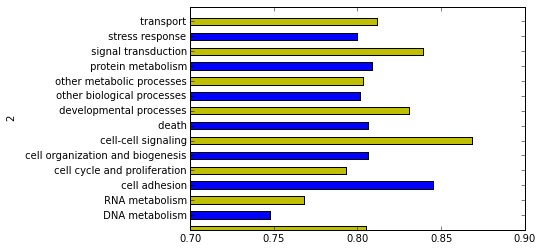

In [57]:
Piura.groupby(2)[1].mean().plot(kind='barh', color=list('yb'))
plt.axis([0.7, 0.9, 0, 15])

In [60]:
from IPython.display import display


In [70]:
from IPython.display import YouTubeVideo
YouTubeVideo('E0FglJRv4Wg')